In [1]:
#Starter File 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
sp_500_div_yield_month = "S&P_500_div_yield_month.csv"
us_yield_curve = "US_Yield_Curve.csv"

sp_500_div_yield_month = pd.read_csv(sp_500_div_yield_month)
us_yield_curve = pd.read_csv(us_yield_curve)

sp_500_div_yield_month_df = pd.DataFrame(sp_500_div_yield_month)
us_yield_curve_df = pd.DataFrame(us_yield_curve)

print(sp_500_div_yield_month_df.shape)
print(us_yield_curve_df.shape)



(1792, 2)
(7560, 13)


In [3]:
yields_monthly_df = pd.merge(sp_500_div_yield_month, us_yield_curve, on=["Date"])
yields_monthly_df.head()

,Date,Value,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
0,2/28/2020,1.97,1.45,1.37,1.27,1.11,0.97,0.86,0.85,0.89,1.03,1.13,1.46,1.65
1,1/31/2020,1.78,1.56,1.57,1.55,1.54,1.45,1.33,1.30,1.32,1.42,1.51,1.83,1.99
2,12/31/2019,1.83,1.48,1.51,1.55,1.60,1.59,1.58,1.62,1.69,1.83,1.92,2.25,2.39
3,11/1/2019,1.87,1.58,1.58,1.52,1.55,1.53,1.56,1.55,1.55,1.63,1.73,2.03,2.21
4,10/31/2019,1.93,1.59,1.59,1.54,1.57,1.53,1.52,1.52,1.51,1.60,1.69,2.00,2.17


In [4]:
yields_monthly_df = pd.DataFrame({
    "Date": yields_monthly_df["Date"],
    "Dividend Yield": yields_monthly_df["Value"],
    "US 10-Yr Yield": yields_monthly_df["10 YR"]
})
yields_monthly_df

,Date,Dividend Yield,US 10-Yr Yield
0,2/28/2020,1.97,1.13
1,1/31/2020,1.78,1.51
2,12/31/2019,1.83,1.92
3,11/1/2019,1.87,1.73
4,10/31/2019,1.93,1.69
...,...,...,...
251,7/31/1990,3.26,8.36
252,5/31/1990,3.30,8.60
253,4/30/1990,3.38,9.04
254,2/28/1990,3.40,8.51


In [5]:
yields_monthly_df = yields_monthly_df.sort_index(axis=0,ascending=False)
yields_monthly_df.head()

,Date,Dividend Yield,US 10-Yr Yield
255,1/31/1990,3.28,8.43
254,2/28/1990,3.40,8.51
253,4/30/1990,3.38,9.04
252,5/31/1990,3.30,8.60
251,7/31/1990,3.26,8.36


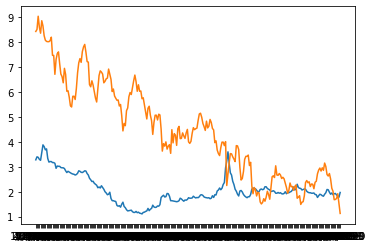

In [8]:
plt.plot(yields_monthly_df["Date"], yields_monthly_df["Dividend Yield"])
plt.plot(yields_monthly_df["Date"], yields_monthly_df["US 10-Yr Yield"])
plt.show()